# Assignment 2

## Downloading the audio file

In [ ]:
!gdown --id 1VRWLpxUXhD4WTrcQ0p5VZ3BJD4_jv4tX

Downloading...
From: https://drive.google.com/uc?id=1VRWLpxUXhD4WTrcQ0p5VZ3BJD4_jv4tX
To: /content/aa.wav
100% 1.48k/1.48k [00:00<00:00, 4.25MB/s]


## Importing the libraries

In [ ]:
import numpy as np
import IPython.display
import scipy.io.wavfile
import matplotlib.pyplot as plt
import librosa.display

## Loading the audio 

Firstly we load the audio and play it out

In [ ]:
audio_path = r"/content/aa.wav" #specifying the path for audio file
 
rate,audio = scipy.io.wavfile.read(audio_path) #reading the sampling rate as well as audio signal
IPython.display.Audio(audio_path) #play audio

A summary of the loaded audio

In [ ]:
duration = audio.shape[0]/rate

print('''
Sampling rate of audio signal : {0} Hz
Samples in Audio : {1} samples
Duration of Audio : {2} seconds
'''.format(rate,audio.shape[0],duration))


Sampling rate of audio signal : 8000 Hz
Samples in Audio : 720 samples
Duration of Audio : 0.09 seconds



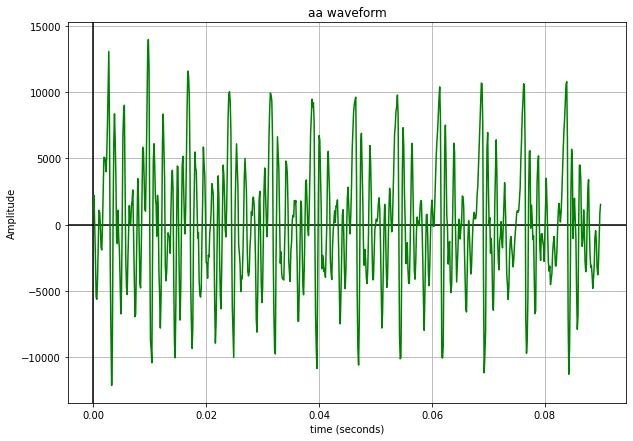

In [ ]:
t = np.linspace(0,duration,audio.shape[0],endpoint=False)

plt.figure(figsize=[10,7])
plt.title("aa waveform")
plt.xlabel("time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.axvline(color="k")
plt.axhline(color="k")
plt.plot(t,audio,color="g")
plt.show()

# 1) Apply pre-emphasis to the signal

Pre-emphasis involves passing the signal through a filter H(Z) = 1 - $\alpha z^{-1}$, where $\alpha = 0.95$

In [ ]:
def Z_transform(num,den,Z):
  Z_num = 0
  Z_den = 0
  for i,p in zip(num,range(0,len(num))):
    Z_num = Z_num + i*(Z**(-p))
  for i,p in zip(den,range(0,len(den))):
    Z_den = Z_den + i*(Z**(-p))
  return Z_num/Z_den

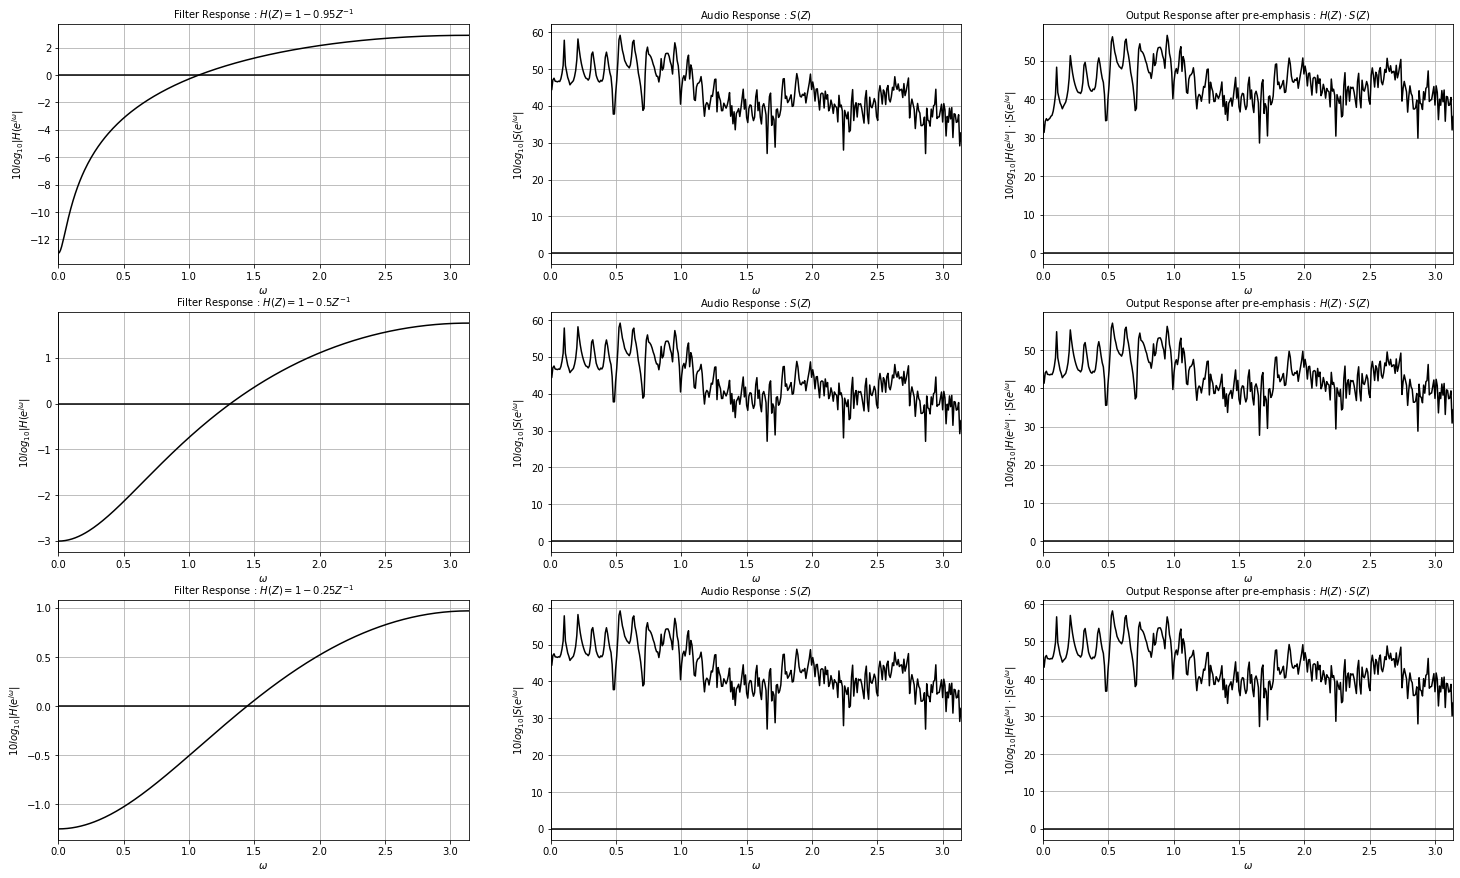

In [ ]:
w = np.linspace(0,6.28,audio.shape[0],endpoint=False)
Z = np.exp(1j*w)


figure = plt.figure(figsize=[25,15])
alpha_values = [0.95,0.5,0.25]

for i in range(0,3):

  alpha = alpha_values[i]
  H_num = [1,-alpha]
  H_den = [1]

  H = Z_transform(H_num,H_den,Z)

  FT_audio = np.fft.fft(audio)
  FT_audio_non_tilted = H*FT_audio

  figure.add_subplot(3,3,3*i+1)
  plt.title(f"Filter Response : $H(Z) = 1 - ${alpha}"+"$ Z^{-1} $",fontsize = 10)
  plt.grid()
  plt.ylabel("$10log_{10}|H(e^{j\omega}|$")
  plt.xlabel("$\omega$")
  plt.axhline(color='k')
  plt.axvline(color='k')
  plt.xlim(0,3.14)
  plt.plot(w,10*np.log10(np.abs(H)),color='k')

  figure.add_subplot(3,3,3*i+2)
  plt.title("Audio Response : $S(Z)$",fontsize = 10)
  plt.grid()
  plt.ylabel("$10log_{10}|S(e^{j\omega}|$")
  plt.xlabel("$\omega$")
  plt.axhline(color='k')
  plt.axvline(color='k')
  plt.xlim(0,3.14)
  plt.plot(w,10*np.log10(np.abs(FT_audio)),color='k')

  figure.add_subplot(3,3,3*i+3)
  plt.title("Output Response after pre-emphasis : $H(Z) \cdot S(Z)$",fontsize = 10)
  plt.grid()
  plt.ylabel("$10log_{10}|H(e^{j\omega}| \cdot |S(e^{j\omega}|$")
  plt.xlabel("$\omega$")
  plt.axhline(color='k')
  plt.axvline(color='k')
  plt.xlim(0,3.14)
  plt.plot(w,10*np.log10(np.abs(FT_audio_non_tilted)),color='k')


plt.show()

Pre-emphasis observations : We see that as the $\alpha$ goes from 0.95 to 0.5 to 0.25, the Magnitude plot has a shallower zero at $\omega$ = 0. Thus the boost for higher frequencies is not as much. We obtain the best frequency boost for $\alpha = 0.95$ where high frequencies have a better amount of boosting.

Here, we have 

>> $H(Z) = 1 - \alpha Z^{-1}$


Let $S_{2}(Z) = H(Z) \cdot S(Z)$, where 

>>$S_{2}(Z)$ = Output response of the filter when input signal $S(Z)$ is applied to it.

Hence :

>> $S_{2}(Z) =  S(Z) - \alpha Z^{-1} S(Z)$
>> $s_{2}[n] = s[n] - \alpha s[n-1]$

Since $s[n]$ is causal, $s[-1] = 0$.

Hence $s_{2}[0] = s[0]$

As a result :

>> $s_{2}[1] = s[1] - \alpha s[0]$
>> $s_{2}[2] = s[2] - \alpha s[1]$, and so on.

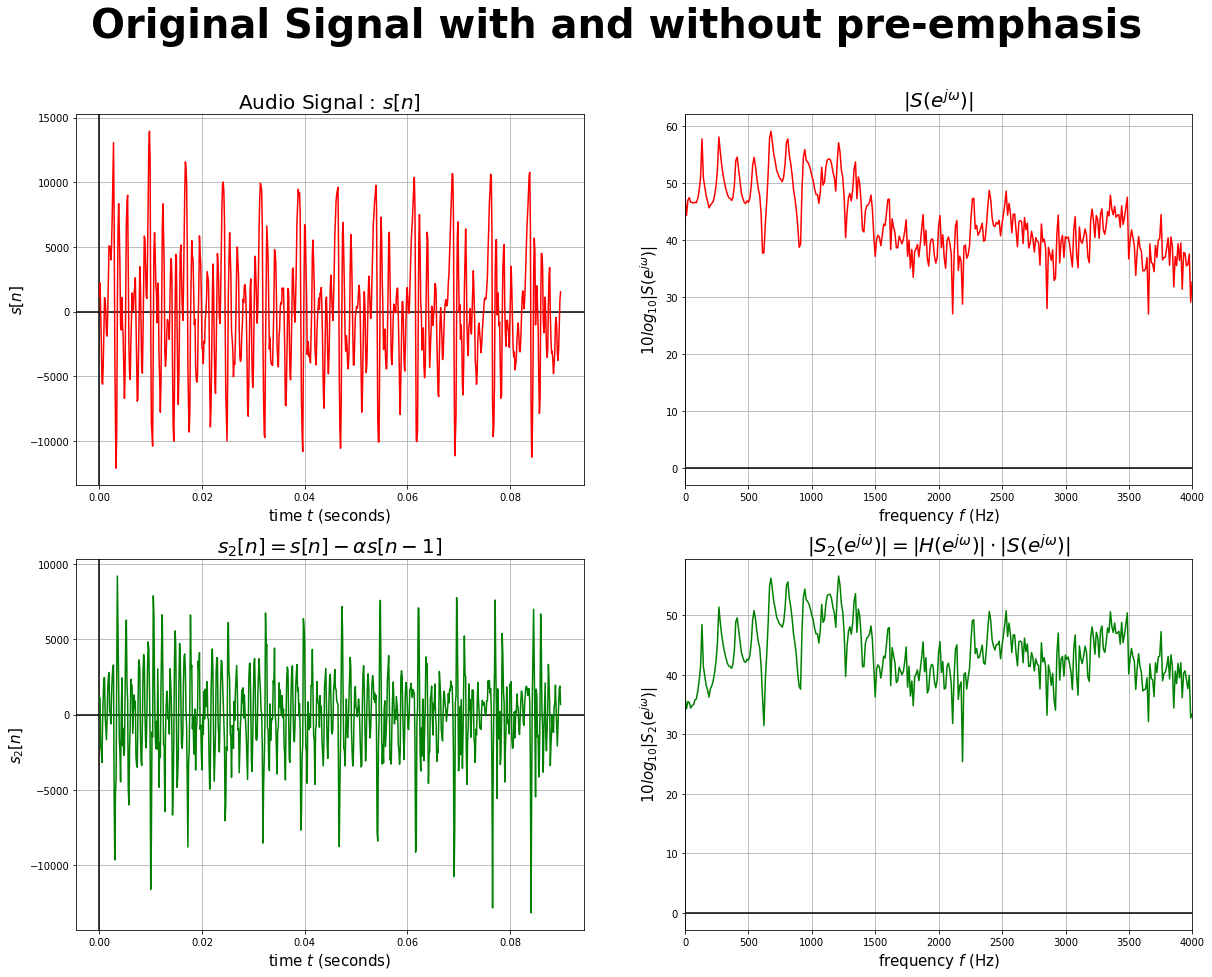

In [ ]:
alpha = 0.95

s2 = np.zeros(audio.shape)

s2[0] = audio[0]

for i in range(1,audio.shape[0]):
  s2[i] = audio[i] - alpha*audio[i-1]

S2 = np.fft.fft(s2)
S = np.fft.fft(audio)

f = ((w*(2*np.pi*rate)/(2*np.pi))/(2*np.pi))

figure = plt.figure(figsize = [20,15])

figure.add_subplot(2,2,1)

plt.suptitle(r"Original Signal with and without pre-emphasis",fontsize=40,color="k",fontweight="bold")

plt.title(r"Audio Signal : $s[n]$",fontsize = 20)
plt.xlabel("time $t$ (seconds)",fontsize = 15)
plt.ylabel(r"$s[n]$",fontsize = 15)
plt.axhline(color="k")
plt.axvline(color="k")
plt.grid()
plt.plot(t,audio,color="r")

figure.add_subplot(2,2,2)
plt.title(r"$|S(e^{j\omega})|$",fontsize = 20)
plt.xlabel("frequency $f$ (Hz)",fontsize = 15)
plt.ylabel(r"$10log_{10}|S(e^{j\omega})|$",fontsize = 15)
plt.axhline(color="k")
plt.axvline(color="k")
plt.grid()
plt.xlim(0,rate//2)
plt.plot(f,10*np.log10(np.abs(S)),color="r")

figure.add_subplot(2,2,3)

plt.title(r"$s_{2}[n] = s[n] - \alpha s[n-1]$",fontsize = 20)
plt.xlabel("time $t$ (seconds)",fontsize = 15)
plt.ylabel(r"$s_{2}[n]$",fontsize = 15)
plt.axhline(color="k")
plt.axvline(color="k")
plt.grid()
plt.plot(t,s2,color="g")

figure.add_subplot(2,2,4)
plt.title(r"$|S_{2}(e^{j\omega})| = |H(e^{j\omega})| \cdot |S(e^{j\omega})|$",fontsize = 20)
plt.xlabel("frequency $f$ (Hz)",fontsize = 15)
plt.ylabel(r"$10log_{10}|S_{2}(e^{j\omega})|$",fontsize = 15)
plt.axhline(color="k")
plt.axvline(color="k")
plt.grid()
plt.xlim(0,rate//2)
plt.plot(f,10*np.log10(np.abs(S2)),color="g")

plt.show()

# 2)Narrowband magnitude spectrum slice after windowing


Firstly, we take both the signals and at extract 30 ms portion from the center of both the spectrums using a Hamming window of length 30 ms. This is followed by STFT slice of both the signals. The plots are shown simultaneously to visualize the difference.

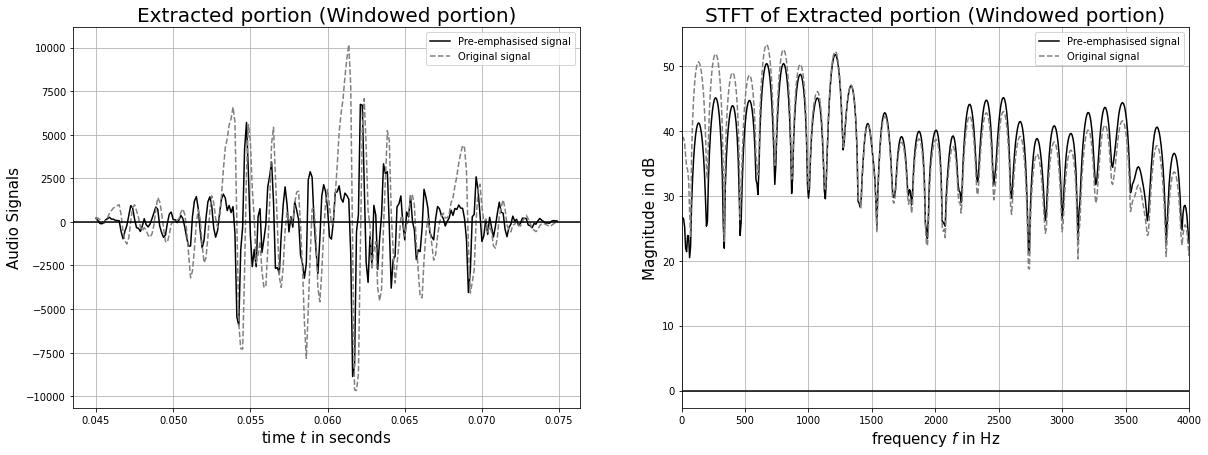

In [ ]:
Hamming_duration = 0.03 #Duration = 30 ms
Hamming_samples = 0.03*rate #Number of samples = 30 ms x Sampling rate

W = np.hamming(Hamming_samples) #Defining the Hamming window
C = audio.shape[0]//2 #Finding the centre of the s2 signal


LL = int(C) #Lower Limit for extraction 
UL = int(C + Hamming_samples) #Upper Limit for extraction

extracted_s2 = s2[LL:UL] #extracted in between LL to UL
extracted_s = audio[LL:UL]

t_windowed = np.linspace(LL/rate,UL/rate,int(Hamming_samples),endpoint=False)
windowed_s2 = W*extracted_s2 #Windowing the signal
windowed_s = W*extracted_s

N = 1024
padded_s2 = np.zeros((N-windowed_s2.shape[0],))
padded_s = np.zeros((N-windowed_s.shape[0],))

padded_s2 = np.concatenate((windowed_s2,padded_s2))
padded_s = np.concatenate((windowed_s,padded_s))

STFT_S2 = np.fft.fft(padded_s2)
STFT_S = np.fft.fft(padded_s)

Mag_S2 = 10*np.log10(np.abs(STFT_S2))
Mag_S = 10*np.log10(np.abs(STFT_S))

f = np.linspace(0,rate,STFT_S2.shape[0],endpoint=False)

figure = plt.figure(figsize=[20,7])
figure.add_subplot(1,2,1)
plt.title("Extracted portion (Windowed portion)",fontsize=20)
plt.xlabel("time $t$ in seconds",fontsize=15)
plt.ylabel(r"Audio Signals",fontsize=15)
plt.grid()
plt.plot(t_windowed,windowed_s2,color='k')
plt.plot(t_windowed,windowed_s,color="gray",linestyle="dashed")
plt.legend(("Pre-emphasised signal","Original signal")) 
plt.axhline(color='k')

figure.add_subplot(1,2,2)
plt.title("STFT of Extracted portion (Windowed portion)",fontsize=20)
plt.xlabel("frequency $f$ in Hz",fontsize=15)
plt.ylabel(r"Magnitude in dB",fontsize=15)
plt.grid()
plt.plot(f,Mag_S2,color='k') 
plt.plot(f,Mag_S,color='gray',linestyle="dashed")
plt.legend(("Pre-emphasised signal","Original signal"))
plt.axhline(color='k')
plt.xlim(0,rate//2)

plt.show()

As evident from the above figure "STFT of Extracted portion", the lower frequency components have a relatively lower amplitude compared to the original signal and higher frequency components have relatively higher amplitude compared to original signal. This is due to use of pre-emphasis with $\alpha = 0.95$

Here, we can see the STFT slice for 30 ms window obtained from 45 ms to 85 ms of the pre-emphasized signal as a part of spectrogram. The X axis is just a repetition of the line obtained from the various frequency points (1024) for better visualization. Y axis represents the frequencies.

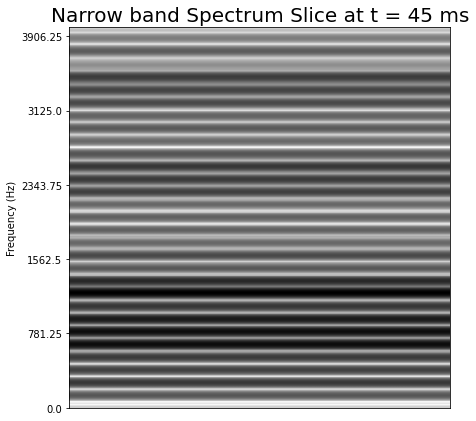

In [ ]:
Maximum = np.max(Mag_S2) #maximum of the pre emphasized signal
Minimum = np.min(Mag_S2) #minimum of the pre emphasized signal

N_STFT = (Mag_S2 - Minimum)/(Maximum - Minimum)
STFT_slice = 255 - ((N_STFT*(255)).astype(np.uint8)).reshape((-1,1)) #Converting magnitudes to pixel intensities

# 0 corresponds to Highest magnitude, 255 corresponds to lowest magnitude

STFT_slice = np.repeat(STFT_slice,512,axis=1) #Repeating the same slice just for visualization

# Plotting the spectrogram slice

plt.figure(figsize=[10,7])
plt.title("Narrow band Spectrum Slice at t = 45 ms",fontsize = 20)
plt.imshow(STFT_slice,cmap="gray")
plt.yticks(np.arange(0,1024,100),[i*rate/1024 for i in range(0,1024,100)])
plt.xticks([])
plt.ylabel("Frequency (Hz)")
plt.ylim(0,512)
plt.show()

#3) Calculating the autocorrelation coefficients

The AutoCorrelation function is given by :

>>$\begin{equation}
r_{ss} [m] = \sum_{n=0}^{\infty} s[n] \cdot s[n+m]
\end{equation}$




The 'acorr_p_samples' function takes in audio signal s[n] and order of Linear Predictor 'p', and yields out autocorrelation function from r[0] to r[p]

In [ ]:
def acorr_p_samples(s): #Function to give p+1 autocorrelation coefficients.
  
  r = np.zeros(s.shape)
  p = s.shape[0]
  for m in range(0,p):
    for n in range(0,p):
      if n+m < s.shape[0]:
        r[m] = r[m] + s[n]*s[n+m]
  
  return r

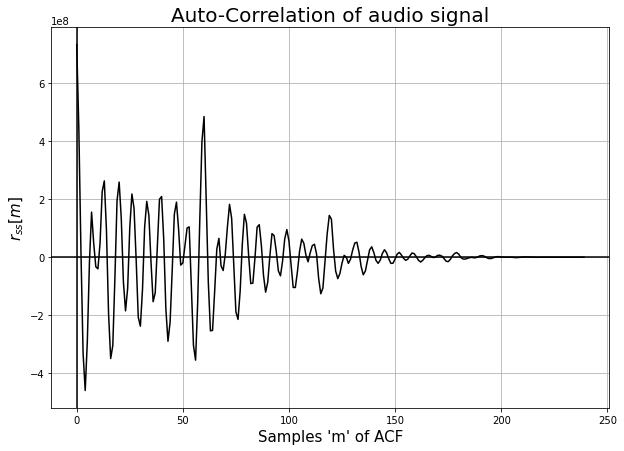

In [ ]:
r = acorr_p_samples(windowed_s2)

plt.figure(figsize=(10,7))
plt.title("Auto-Correlation of audio signal",fontsize=20)
plt.xlabel("Samples 'm' of ACF",fontsize=15)
plt.ylabel(r"$r_{ss}[m]$",fontsize=15)
plt.plot(r,color='k')
plt.grid()
plt.axhline(color='k')
plt.axvline(color='k')
plt.show()

As per the Levinson - Durbin recurrsion equations :

>>$\begin{equation}
r_{ss} [i] = \sum_{k=1}^{p} a_{k} \cdot r_{ss}[i-k]
\end{equation}$

The error at optimal $a_{k}$ i.e. $E_{min}$ is given by :

>>$\begin{equation}
E_{min} = r_{ss}[0] - \sum_{k=1}^{p} a_{k} \cdot r_{ss}[k]
\end{equation}$

Levinson Durbin method describes a recurrsive method to estimate parameters like $a_{j}^{(i)}$ , $E^{(i)}$ using reflection coefficients $k^{(i)}$ as well as autocorrelation function $r_{ss}[m]$. The method is implied in the following code block.

Matrix descriptions for below defined LevinsonDurbin function:

$E$ : A $p$ x $1$ matrix where $E^{(i)}$ is the Minimum Error for $i$ th order Linear Predictor.

$a$ : A $p$ x $p$ matrix where $a[i][j]$ corresponds to $a_{j}$ coefficient for $i$ th order Linear predictor.

$k$ : A $p$ x $1$ matrix where $k^{(i)}$ corresponds to reflection coefficient for $i$ th order Linear predictor.

$r\_1$ : Auto-correlation function for pre-emphasized signal $s_{2}[n]$


In [ ]:
def LevinsonDurbin(r_1,p):

  N = p.shape[0]

  #Defining respective matrices
  E = np.zeros((N,)) 
  k = np.zeros((N,))
  a = np.zeros((N,N))

  E[0] = r_1[0]
  k[1] = r_1[1]/E[0]

  a[1,1] = k[1]
  E[1] = (1 - (k[1]**2))*E[0]

  for i in range(2,N):
    k[i] = (r_1[i])/(E[i-1])
    for j in range(1,i):
      k[i] = k[i] - (r_1[i-j]*a[i-1,j]/E[i-1])
    a[i,i] = k[i]
    for j in range(1,i):
      a[i,j] = a[i-1,j] - k[i]*a[i-1,i-j]  
    
    E[i] = (1 - (k[i]**2))*E[i-1]

  return E,k,a #Returns Error matrix, k matrix as well as 'a' matrix


Here, $P$ matrix contains integer values from 0 to '$p$' so that we can obtain the Error matrix with increasing 'p'. $E^{(0)}$ corresponds to the Linear Predictor with $p=0$ and $E^{(p)}$ is the error for Linear Predictor with order '$p$'.

Plotting the $E_{min}$ for p values from 0 to 50 below.

In [ ]:
P = np.arange(0,51,1)
print("p : ",P)
E,k,a = LevinsonDurbin(r,P)

print('''
E : {},
k = {},
a = {}'''.format(E,k,a))

p :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]

E : [7.31471008e+08 4.63685817e+08 3.28848869e+08 2.93500869e+08
 2.81098907e+08 2.78604804e+08 2.77299545e+08 2.66649449e+08
 1.72839854e+08 1.65311053e+08 1.63964169e+08 1.63019089e+08
 1.62743621e+08 1.62468130e+08 1.61151987e+08 1.61149690e+08
 1.60060888e+08 1.60000852e+08 1.59554129e+08 1.57160871e+08
 1.52004423e+08 1.50913152e+08 1.46529029e+08 1.45746144e+08
 1.44920368e+08 1.43592094e+08 1.39195285e+08 1.36203140e+08
 1.34893045e+08 1.34704697e+08 1.31861325e+08 1.31861055e+08
 1.31111271e+08 1.30570038e+08 1.28995393e+08 1.25425466e+08
 1.25300819e+08 1.24644426e+08 1.19912689e+08 1.19906951e+08
 1.17226845e+08 1.16130149e+08 1.15232483e+08 1.13399414e+08
 1.10789422e+08 1.09692838e+08 1.07425177e+08 1.06684717e+08
 1.03563671e+08 1.02850143e+08 1.02593106e+08],
k = [ 0.          0.60505481 -0.53925298 -0.32785684 

Now, Autocorrelation coefficients for $p = 2,4,6,8,10$ and LP coefficients correspondingly.  

In [ ]:
def get_ACF_LP_coeffs(p_reqd,r_reqd):
  p_limit = np.max(p_reqd) + 1
  p = np.arange(0,p_limit,1)
  E,k,a = LevinsonDurbin(r_reqd,p)
  E_reqd = np.array([E[i] for i in p_reqd],dtype=np.float64)
  a_reqd = np.array([a[i,1:] for i in p_reqd],dtype=np.float64)
  r_return = np.array([r_reqd[1:i] for i in p_reqd],dtype=object)

  return E_reqd,a_reqd,r_return

In [ ]:
p_reqd = np.array([2,4,6,8,10])
E_p,a_p,r_p = get_ACF_LP_coeffs(p_reqd,r)

print("Error for different values of p : ")
for i in range(0,E_p.shape[0]):
  print("p =  ",p_reqd[i],"  : ", "E = ",E_p[i])

print("\na for different values of p : ")
for i in range(0,E_p.shape[0]):
  print("p =  ",p_reqd[i],"  : ", "a = ",np.round(a_p[i,:],decimals=3))

print("\nr for different values of p : ")
for i in range(0,E_p.shape[0]):
  print("p =  ",p_reqd[i],"  : ", "r = 10^8 * ",np.round(r_p[i]/1e8,decimals = 3))


Error for different values of p : 
p =   2   :  E =  328848869.4806324
p =   4   :  E =  281098907.02557325
p =   6   :  E =  277299545.01802194
p =   8   :  E =  172839853.81661788
p =   10   :  E =  163964169.3684188

a for different values of p : 
p =   2   :  a =  [ 0.931 -0.539  0.     0.     0.     0.     0.     0.     0.     0.   ]
p =   4   :  a =  [ 0.687 -0.282 -0.173 -0.206  0.     0.     0.     0.     0.     0.   ]
p =   6   :  a =  [ 0.713 -0.284 -0.156 -0.288  0.143 -0.068  0.     0.     0.     0.   ]
p =   8   :  a =  [ 0.583 -0.214 -0.161 -0.508 -0.039 -0.081  0.219 -0.593  0.     0.   ]
p =   10   :  a =  [ 0.688 -0.195 -0.168 -0.496  0.061 -0.002  0.277 -0.691  0.145  0.09 ]

r for different values of p : 
p =   2   :  r = 10^8 *  [4.426]
p =   4   :  r = 10^8 *  [ 4.426  0.177 -3.3  ]
p =   6   :  r = 10^8 *  [ 4.426  0.177 -3.3   -4.585 -2.896]
p =   8   :  r = 10^8 *  [ 4.426  0.177 -3.3   -4.585 -2.896 -0.167  1.551]
p =   10   :  r = 10^8 *  [ 4.426  0.177 -3.3  

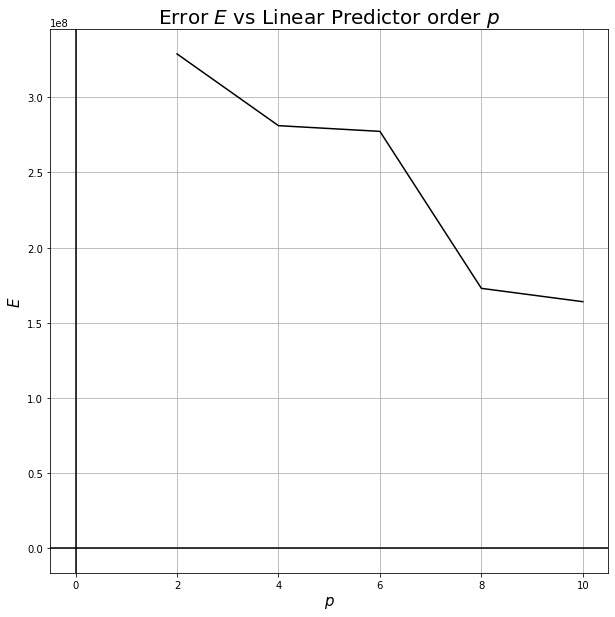

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Error $E$ vs Linear Predictor order $p$",fontsize=20)
plt.ylabel("$E$",fontsize=15)
plt.xlabel("$p$",fontsize=15)
plt.axhline(color="k")
plt.axvline(color="k")
plt.grid()
plt.plot(p_reqd,E_p,color="k")
plt.show()

For $p = 0$ to $50$, we get the following plot.

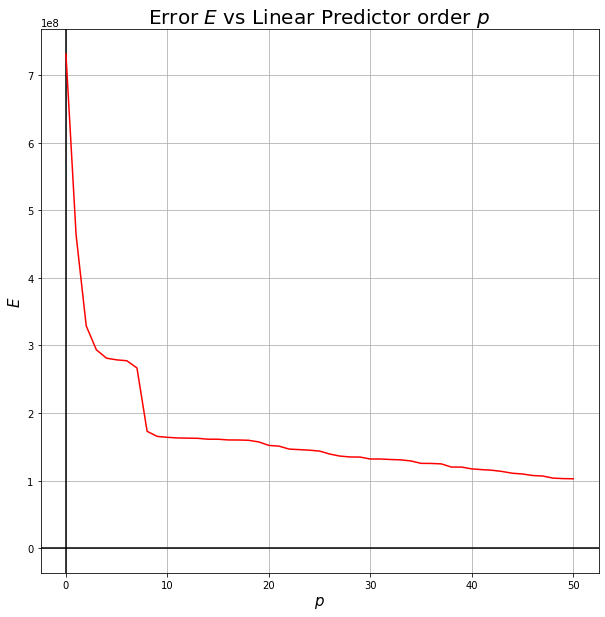

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Error $E$ vs Linear Predictor order $p$",fontsize=20)
plt.ylabel("$E$",fontsize=15)
plt.xlabel("$p$",fontsize=15)
plt.axhline(color="k")
plt.axvline(color="k")
plt.grid()
plt.plot(P,E,color="red")
plt.show()

As we can observe, the error goes on decreasing with increase in order $p$.

# 4) Pole-Zero plots for $p = 6$ and $p = 10$

Firstly, the function PZplot will take in the numerator and denominator of the Transfer function $H(Z) = \frac{G}{A(Z)}$ where $A(Z)$ is given by the following equation :

$\begin{equation}
A(Z) = 1 - \sum_{k=1}^{k=p} a_k Z^{-k}
\end{equation}$

Hence $H(Z)$ will not have any zeros, but $p$ poles which are also the roots of the equation $A(Z) = 0$.

In [ ]:
import matplotlib

def PZplot(H_num,H_den):

  figure = plt.figure(figsize = [10,10])
  ax = figure.add_subplot(1,1,1)

  unit_circle = matplotlib.patches.Circle((0,0),radius=1,fill = False, color = "black")
  ax.add_patch(unit_circle)

  z,p,k = scipy.signal.tf2zpk(H_num,H_den)
  print("Poles : {0}, Zeros : {1}".format(p,z))

  plt.plot(p.real,p.imag,"kx",markersize = 15)
  plt.plot(z.real,z.imag,"ko",markersize = 10,markeredgewidth = 0)
  
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('center')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.grid()
  plt.title("P Z plot")
  plt.legend(["poles","zeros"])
  text = "Number of poles : {0} \nNumber of Zeros : {1} \nPole Locations : {2} \nZero Locations : {3}".format(len(p),len(z),np.round(p,3),np.round(z,3))
  plt.text(1,-1,text)
  plt.xlim(-2,2)
  plt.ylim(-2,2)
  plt.show()


Now we estimate the coefficients corresponding to $p = 6$ and pass the coefficients of $A(Z)$ as the denominator of $H(Z)$

Poles : [-0.5081035 +0.47296035j -0.5081035 -0.47296035j  0.63171256+0.62661186j
  0.63171256-0.62661186j  0.23286606+0.35382644j  0.23286606-0.35382644j], Zeros : []


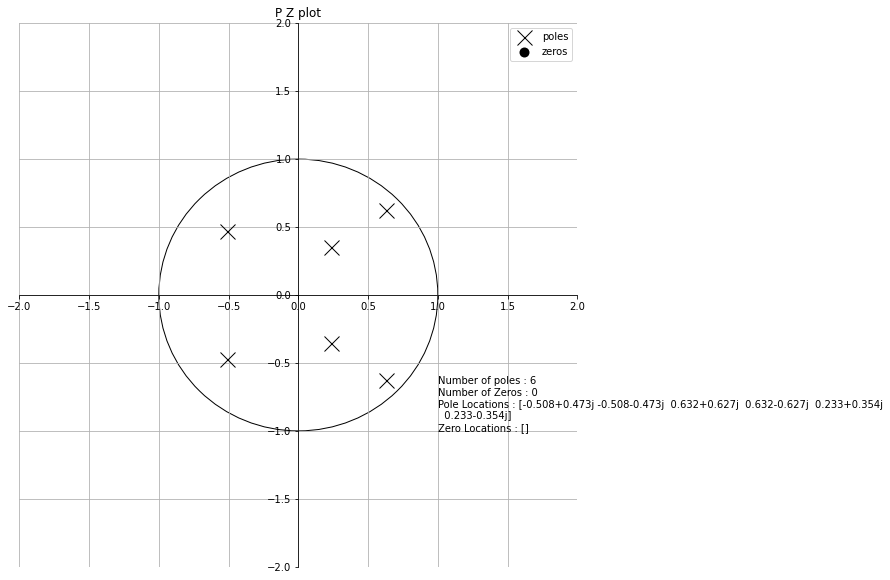

In [ ]:
# We concatenate '1' with negative of a_p[2] to get the polynomial A(Z)
# a_p[2] is 2nd element of a_p matrix corresponding to the p = 6
H_den = (np.concatenate((np.ones((1,)),-a_p[2]),axis=0))[0:7]
H_num = [1]

PZplot(H_num,H_den)

Similarly, we obtain the coefficients corresponding to $p = 10$ and pass the coefficients of $A(Z)$ as the denominator of $H(Z)$

Poles : [-0.82543402+0.43408586j -0.82543402-0.43408586j -0.31833756+0.88727156j
 -0.31833756-0.88727156j  0.55310096+0.79092801j  0.55310096-0.79092801j
  0.79773016+0.50948347j  0.79773016-0.50948347j  0.53547347+0.j
 -0.26134261+0.j        ], Zeros : []


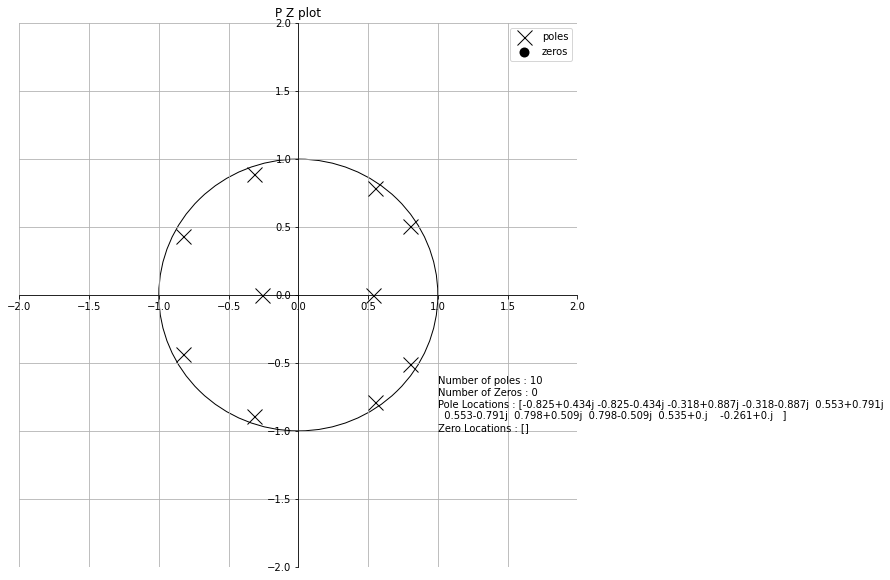

In [ ]:
# We concatenate '1' with negative of a_p[2] to get the polynomial A(Z)
# a_p[4] is 5th element of a_p matrix corresponding to the p = 10
H_den = (np.concatenate((np.ones((1,)),-a_p[4]),axis=0))
H_num = [1]
PZplot(H_num,H_den)

The poles get much closer to unit circle as $p$ increases

The complex poles are complex conjugate pairs.

All poles lie inside the unit circle indicating that the system $H(Z)$ is a stable one.

#5) Gain computation and LPC spectrum magnitude for each $p$

For the filter given by $H(Z) = \frac{G}{A(Z)}$, we compute G using the following equation : 

$G^{2} = E_{min}$

Hence, $G = \sqrt{E_{min}}$

TransferFunction defined below gives out Magnitude response for given set of values of 'p'. For $p = [2,4,6,8,10]$, The TransferFunction returns $Mag\_H$ Matrix whose row 1 consists of Magnitude response for $p=2$, row 2 consists of Magnitude response for $p=4$ and so on.

In [ ]:
def TransferFunction(G,a): #The function takes G value and corresponding 'a's to generate response H(Z), and then Magnitude response.
  
  w = np.linspace(0,6.28,1024,endpoint=False) 
  Z = np.exp(1j*w) # Z = e^jw
  H_num = np.zeros(G.shape,dtype=object) #Array containing numerators for each 'p'
  H_den = np.zeros(G.shape,dtype=object) #Array containing denominators for each 'p'
  Mag_H = np.zeros((G.shape[0],w.shape[0]),dtype=np.complex256) #The magnitude matrix


  for i in range(0,G.shape[0]): #iterate through G values for different 'p' 
    H_den[i] = (np.concatenate((np.ones((1,)),-a_p[i]),axis=0)) #denominator array
    H_num[i] = np.array([G[i]]) #numerator array
    Mag_H[i,:] = Z_transform(H_num[i].tolist(),H_den[i].tolist(),Z) #Magnitude for given 'G' and 'a' value

  return 10*np.log10(np.abs(Mag_H)) #Returns logarithm of Magnitude of the matrix


In [ ]:
p_reqd = np.array([2,4,6,8,10]) #Values of p
E_p,a_p,r_p = get_ACF_LP_coeffs(p_reqd,r) #Returns coeffs corresponding to p = 2,4,6,8,10 but in matrix forms

G_p = np.sqrt(E_p) #Values of G

Mag_H = TransferFunction(G_p,a_p) 

print("G for different values of p : ")
for i in range(0,G_p.shape[0]):
  print("p =  ",p_reqd[i],"  : ", "G = ",G_p[i])

G for different values of p : 
p =   2   :  G =  18134.190621051508
p =   4   :  G =  16766.004503923206
p =   6   :  G =  16652.313503475183
p =   8   :  G =  13146.857184004772
p =   10   :  G =  12804.849447315608


Comparison of the LPC Spectrum Magnitude plots for various $p$ values.

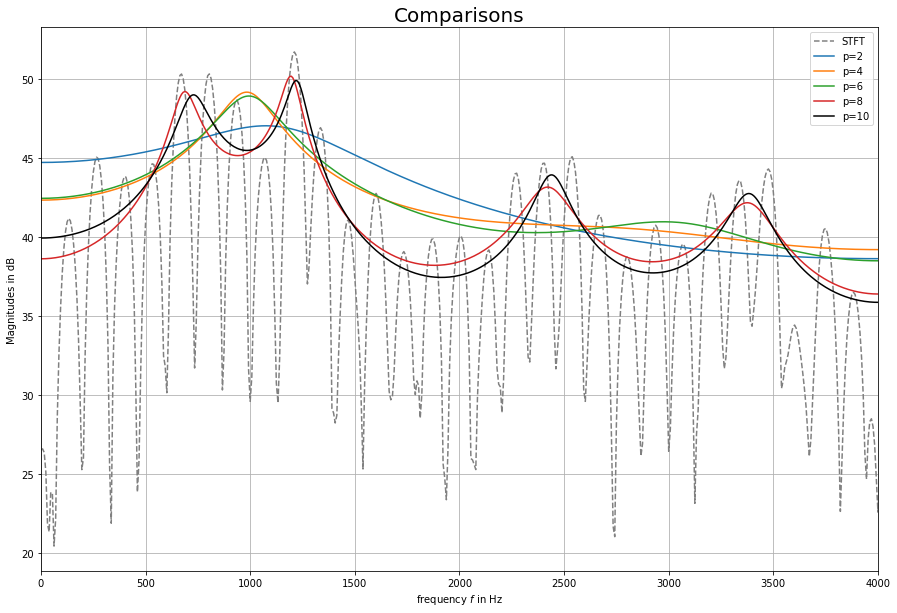

In [ ]:
#Plotting for various p values

plt.figure(figsize=[15,10])
plt.title("Comparisons",fontsize = 20)
plt.plot(f,Mag_S2,color="gray",linestyle="dashed")
plt.plot(f,Mag_H[0,:])
plt.plot(f,Mag_H[1,:])
plt.plot(f,Mag_H[2,:])
plt.plot(f,Mag_H[3,:])
plt.plot(f,Mag_H[4,:],color="k")
plt.xlabel("frequency $f$ in Hz")
plt.ylabel("Magnitudes in dB")
plt.legend(["STFT","p=2","p=4","p=6","p=8","p=10"])
plt.xlim(0,rate//2)
plt.grid()
plt.show()

**Comparison between the Magnitude plots**

The dotted plot indicates the Magnitude plot corresponding to STFT of the windowed and pre-emphasized signal using Hamming Window.

The corresponding plots are for $p = 2,4,6,8,10$

* For $p=2$, we know that only two poles are there in the transfer 
function thus majority details are not captured.

* As $p$ increases, the spectrum tends to capture more and more details of the audio signal (Formant frequencies in this case).

* Important Observation : At peaks, the envelopes spectrums are always below the STFT Spectrum while at valleys, the envelopes are always above the STFT Spectrum. This way, the average error ratio throughout the plot remains constant.

* For $p=10$, the better plot is obtained. This plot is able to capture all the possible formant frequencies. The envelope is hugging the peaks of the original spectrum.

* For a much larger value of $p$, the spectrum tries to hug even the peaks corresponding to the harmonics, the error reduces but the purpose of LP analysis is lost. We obtain peaks at unnecessary locations also as evident from the below two plots.

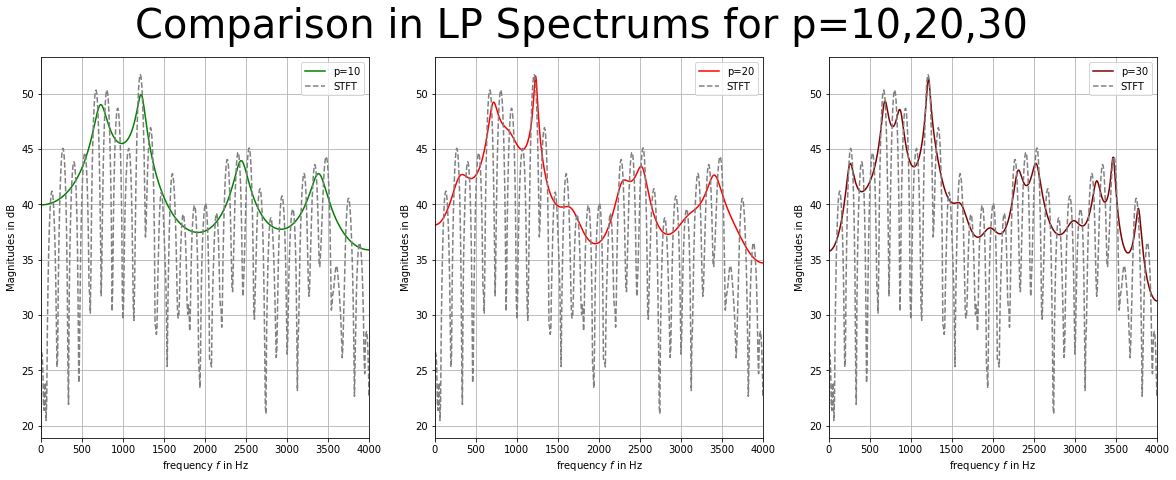

In [ ]:
p_reqd = [10,20,30]

E_p,a_p,r_p = get_ACF_LP_coeffs(p_reqd,r) #Returns coeffs corresponding to p = 2,4,6,8,10 but in matrix forms

G_p = np.sqrt(E_p)

Mag_H = TransferFunction(G_p,a_p)

Mag_p_10 = Mag_H[0,:] 
Mag_p_20 = Mag_H[1,:]
Mag_p_30 = Mag_H[2,:]

figure = plt.figure(figsize = [20,7])
plt.suptitle("Comparison in LP Spectrums for p=10,20,30",fontsize=40)
figure.add_subplot(1,3,1)

plt.xlabel("frequency $f$ in Hz")
plt.ylabel("Magnitudes in dB")
plt.plot(f,Mag_p_10,color="green")
plt.plot(f,Mag_S2,color="gray",linestyle="dashed")
plt.legend(["p=10","STFT"])
plt.xlim(0,rate//2)
plt.grid()


figure.add_subplot(1,3,2)
plt.xlabel("frequency $f$ in Hz")
plt.ylabel("Magnitudes in dB")
plt.plot(f,Mag_p_20,color="red")
plt.plot(f,Mag_S2,color="gray",linestyle="dashed")
plt.legend(["p=20","STFT"])
plt.xlim(0,rate//2)
plt.grid()

figure.add_subplot(1,3,3)
plt.xlabel("frequency $f$ in Hz")
plt.ylabel("Magnitudes in dB")
plt.plot(f,Mag_p_30,color="maroon")
plt.plot(f,Mag_S2,color="gray",linestyle="dashed")
plt.legend(["p=30","STFT"])
plt.xlim(0,rate//2)
plt.grid()

plt.show()

We can see that $p=20$ captures the formant missed by $p=10$ for $f<500$, whereas the $p=40$ captures formant near $f = 2000$ but also at the same time it is hugging unnecessary peaks like those in between $f=500$ to $f=1000$. 

#6) Inverse Filtering to obtain residual error signal

When we pass residual signal $e[n]$ through $H(Z) = \frac{G}{A(Z)}$, we get the exact $s[n]$. Conversely stated, if we pass $s[n]$ through a filter with filter transfer function $H^{-1}(Z) = \frac{A(Z)}{G}$, we will get $e[n]$ signal back.

Again, we can use the approach : 

>> $H^{-1}(Z) \cdot S[Z] = E[Z]$

>> $A(Z) \cdot S[Z] = G \cdot E[Z]$

>> $s[n] - \sum_{k=1}^{k=p}a_k s[n-k] = G \cdot e[n]$

>> $e[n] = \frac{1}{G} (s[n] - \sum_{k=1}^{k=p}a_k s[n-k])$

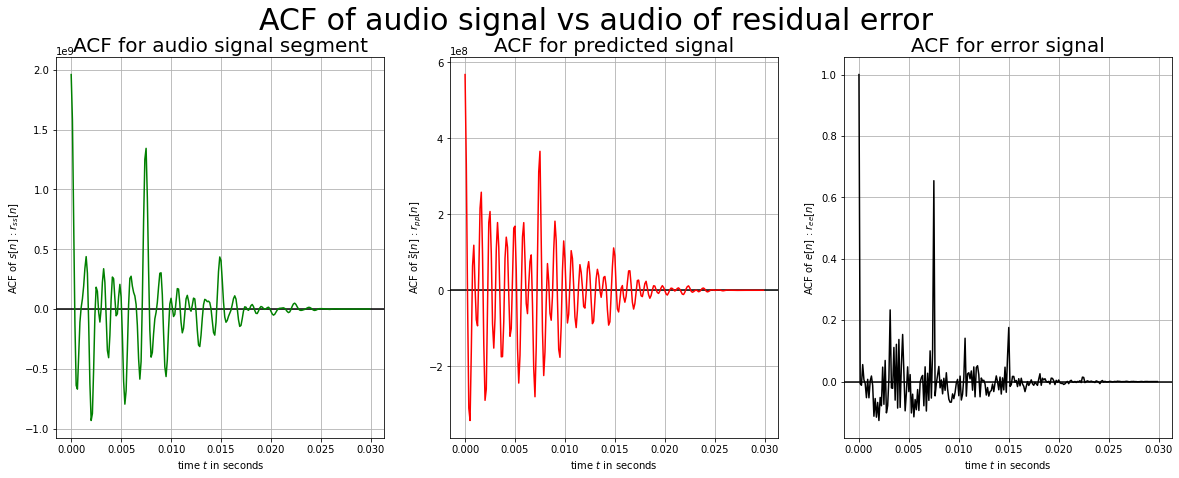

In [ ]:
#Getting the Filter coefficients for p = 10$

a_10 = a_p[0][:10]


#Function to get the error signal. Input is signal, 'a' coefficients and 'G' gain. 
#In this function, we first estimate the predicted signal using the difference equation method, and then subtract it from original audio
#Then finally divide by G to get error signal
def predicted_error(s,a,G):

  s = np.reshape(s,(-1,1))
  s_pred = np.zeros((s.shape[0],1))

  for n in range(0,s_pred.shape[0]):
    for i in range(0,a.shape[0]):
      if (n-i) > 0:
        s_pred[n] += a[i]*s[n-i-1] 

  e = (s - s_pred)/G 
  return e,s_pred

e,s_pred = predicted_error(windowed_s2,a_10,G_p[0])

r_e = acorr_p_samples(e)
r_1 = acorr_p_samples(windowed_s)
r_2 = acorr_p_samples(s_pred)

x = (np.arange(0,len(r_e),1))/rate

figure = plt.figure(figsize = [20,7])
plt.suptitle("ACF of audio signal vs audio of residual error",fontsize=30)
figure.add_subplot(1,3,1)
plt.title("ACF for audio signal segment",fontsize = 20)
plt.xlabel("time $t$ in seconds")
plt.ylabel("ACF of $s[n]$ : $r_{ss}[n]$")
plt.axhline(color="k")
plt.plot(x,r_1,color="g")
plt.grid()

figure.add_subplot(1,3,2)
plt.title("ACF for predicted signal",fontsize = 20)
plt.xlabel("time $t$ in seconds")
plt.ylabel(r"ACF of $\tilde{s}[n]$ : $r_{pp}[n]$")
plt.axhline(color="k")
plt.plot(x,r_2,color="r")
plt.grid()

figure.add_subplot(1,3,3)
plt.title("ACF for error signal",fontsize = 20)
plt.xlabel("time $t$ in seconds")
plt.ylabel("ACF of $e[n]$ : $r_{ee}[n]$")
plt.axhline(color="k")
plt.plot(x,r_e,color="black")
plt.grid()

plt.show()

As seen from the above plot, the error signal has peaks corresponding to the pitch period. Pitch period is obtained by reversing this interval.

In [ ]:
import plotly.express as px

plot = px.line(x = (np.arange(0,len(r_e),1))/8000,y = r_e,labels = {"x" : "time t in seconds (Corresponding to samples of ACF)","y":"ACF of error signal (e[n])"})
plot.show()

As we can see from above plot, when we put the cursor on the first peak, the time t = 0 seconds, and when we put it on the next peak, the time is t = 0.0075 seconds.

Hence, pitch is given by :

>> $F_{o} = \frac{1}{t_2 - t_1}$  

>> $F_{o} = \frac{1}{0.0075 - 0}$

>> $F_{o} = 133.33 Hz$

Thus, the pitch calculated from residual comes out to be $ 133.33 Hz $ 

Observation between both the ACF plots (residual signal and original speech) : 

Key difference is that we can observe in residual signal has peaks at the frequency corresponding to fundamental frequency while elsewhere it is not so noticeable, whereas in original signal, we observe that there the ACF still has comparable amount of magnitude in between the peaks.



# Bonus Question 

To reconstruct the signal, first we generate impulse train corresponding to pitch $F_{o} = 133.33$

As we saw above, pitch of 133.33 Hz corresponds to period of 60 samples. We start by defining a function to define the impulse train of specified period.

In [ ]:
def get_impulse_train(F,duration,Fs): #This function gives impulse train corresponding to frequency F.

  N = int(Fs/F) 
  samples = duration*Fs

  n = np.arange(0,int(duration*Fs))
  train = np.zeros(n.shape,)

  N_lim = int(samples//N)
  
  for i in range(0,N_lim):

    train = np.where(n == i*N,1,train)

  return train
  


Now we use the difference equation method to generate $y[n]$

$ Y(Z) = \frac{G}{A(Z)} \cdot H'(Z) $ where $H'(Z)$ is the Z transform of impulse train.


$y[n] = G \cdot h[n] + \sum_{k=1}^{k=p}a_k y[n-k])$

In [ ]:
def response(p,h,a,G):
  x = np.zeros(h.shape)
  for n in range(0,h.shape[0]):

    
    x[n] = G*h[n]
    for i in range(0,p):

      if n - i > 0:
        x[n] += a[i]*x[n-i-1]
        
    
  return x


Finally, we plot the waveform for LP of p = 10, after passing through de emphasis Filter $ \frac{1}{1-0.95 Z^{-1}}$

$\tilde{Y}(Z) = \frac{1}{1-0.95 Z^{-1}} \cdot Y(Z)$

$\tilde{y}[n] = 0.95 \tilde{y}[n-1] + y[n]$

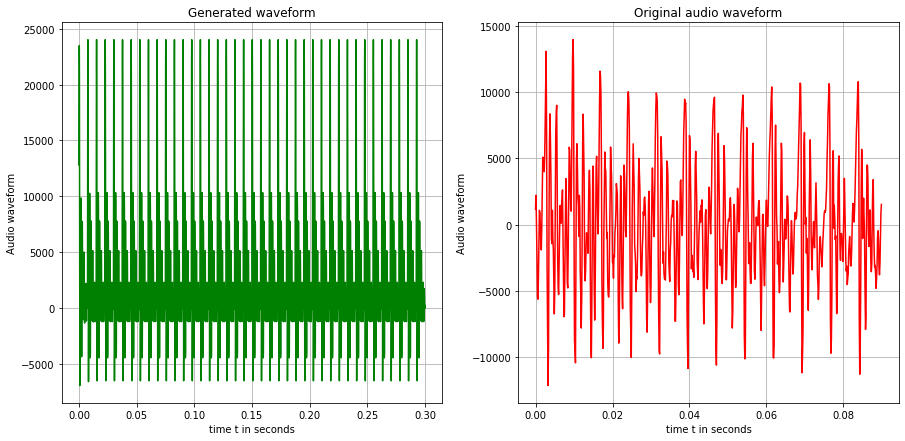

In [ ]:
h = get_impulse_train(133.33,0.3,8000)
t = np.arange(0,h.shape[0])/rate
y = response(10,h,a_10,G_p[0])
t2 = np.arange(0,audio.shape[0])/rate
#de emphasis for the signal
y_dem = np.zeros(y.shape)
y_dem[0] = y[0]
for i in range(1,y.shape[0]):
  y_dem[i] = y[i] + 0.95*y_dem[i-1]


fig = plt.figure(figsize=[15,7])

fig.add_subplot(1,2,1)
plt.title("Generated waveform")
plt.xlabel("time t in seconds")
plt.ylabel("Audio waveform")
plt.grid()
plt.plot(t,y_dem,color="g")

fig.add_subplot(1,2,2)
plt.title("Original audio waveform")
plt.xlabel("time t in seconds")
plt.ylabel("Audio waveform")
plt.grid()
plt.plot(t2,audio,color="r")
plt.show()

As we can note, the generated waveform is more uniform compared to the variations in original signal.

Playing the Audio

In [ ]:
scipy.io.wavfile.write("y_pred.wav",rate,(y_dem).astype(np.int16))

IPython.display.Audio("y_pred.wav")

Playing the Original Audio

In [ ]:
IPython.display.Audio(audio_path) 

As we can observe, the sound is distinguishable by the fact that the first sound is more monotonous, compared to the original sound since we synthetically generate it using impulse train. But still a good approximation for original signal with p = 10.

Now generating at a pitch of 250 Hz

In [ ]:
h_250 = get_impulse_train(250,0.3,8000)
t_250 = np.arange(0,h.shape[0])/rate
y_250 = response(10,h_250,a_10,G_p[0])

#de emphasis for the signal
y_dem_250 = np.zeros(y_250.shape)
y_dem_250[0] = y_250[0]
for i in range(1,y.shape[0]):
  y_dem_250[i] = y_250[i] + 0.95*y_dem_250[i-1]

scipy.io.wavfile.write("y_pred_250.wav",rate,(y_dem_250).astype(np.int16))

IPython.display.Audio("y_pred_250.wav")

Thus, the sound also gets translated to higher pitch.